<a href="https://colab.research.google.com/github/ankitmavani/Hotel_booking_data_analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("drive/MyDrive/AlmaBetter/Project/Hotel Bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
for i in df.columns:
    print("-"*32)
    print(i , df[i].nunique())
    print(df[i].unique())

--------------------------------
hotel 2
['Resort Hotel' 'City Hotel']
--------------------------------
is_canceled 2
[0 1]
--------------------------------
lead_time 479
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 1

# Missing Data in Dataset


In [8]:
Missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
Missing_data.columns = ["number_of_missing_data", "missing_data_percentage"]
Missing_data.sort_values(by = ["number_of_missing_data"],ascending=False).head()

,number_of_missing_data,missing_data_percentage
company,112593.0,94.306893
agent,16340.0,13.686238
country,488.0,0.408744
children,4.0,0.003350
reserved_room_type,0.0,0.000000


# Data Cleaning

## drop duplicate and more missing value columns

In [9]:
df[df.duplicated()].shape

(31994, 32)

In [10]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(87396, 32)

In [11]:
df.drop(labels=["agent","company"],axis=1,inplace=True)
df.shape

(87396, 30)

# Data Analysis

## Hotel and booking cancel or not analysis


### **Reservations in different Hotel Type**

,Number_Of_Data,Percentage_Of_Data
City Hotel,53428.0,61.133233
Resort Hotel,33968.0,38.866767


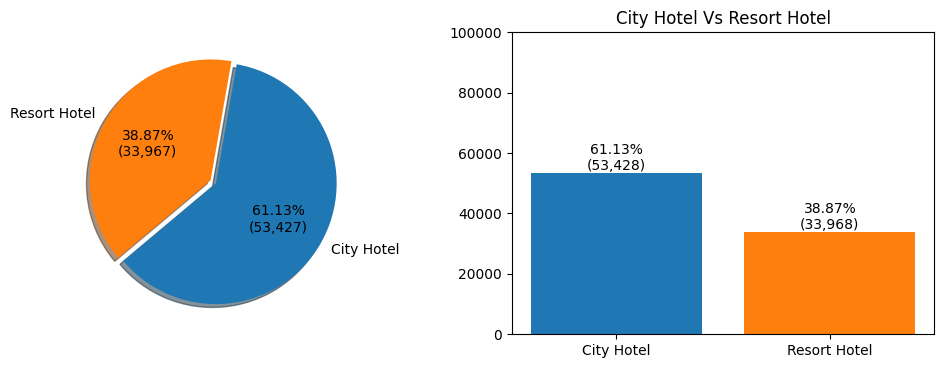

In [14]:
count_data = pd.DataFrame([df["hotel"].value_counts(),df["hotel"].value_counts(normalize=True)*100]).T
count_data.columns = ["Number_Of_Data", "Percentage_Of_Data"]

display(count_data)

fig, ax = plt.subplots(1,2,figsize= (12, 4), dpi = 100)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

explode = (0, 0.05)

ax[0].pie(
    df["hotel"].value_counts(), 
    labels = ["City Hotel","Resort Hotel"], 
    autopct = lambda pct : func(pct,df["hotel"].value_counts()), 
    shadow = True,
    startangle = 220, 
    explode = explode,
    textprops=dict(color='black')
)

plt.title("City Hotel Vs Resort Hotel")

def func1(height):
    total = len(df["hotel"])
    pct =((height * 100)/total).round(2)
    return "{:.2f}%\n({:,})".format(pct, height)

g = ax[1].bar(df["hotel"].value_counts().index,df["hotel"].value_counts(),color=["#1f77b4","#ff7f0e"])

for rect in g:
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2.0, height,func1(height),ha='center', va='bottom')

plt.ylim((0,100000))
    
plt.title("City Hotel Vs Resort Hotel")

plt.show()

1. City Hotels are most preferred hotel by guests. Thus city hotels has maximum bookings.

### **Booking is cancel or not**

,Number_Of_Data,Percentage_Of_Data
0,63371.0,72.510184
1,24025.0,27.489816


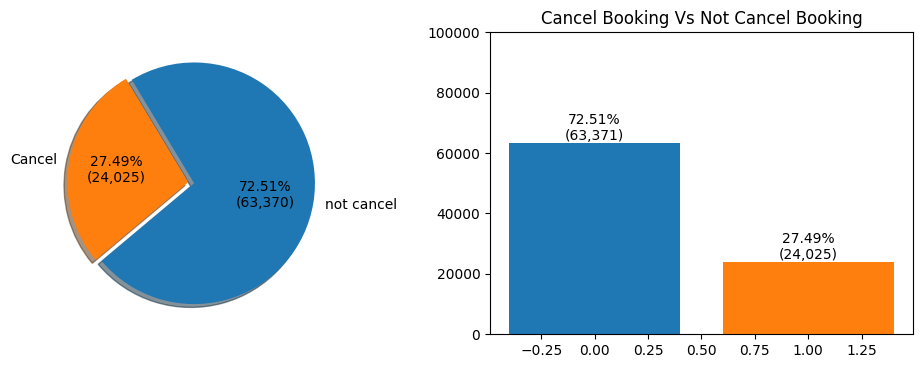

In [21]:
count_data = pd.DataFrame([df["is_canceled"].value_counts(),df["is_canceled"].value_counts(normalize=True)*100]).T
count_data.columns = ["Number_Of_Data", "Percentage_Of_Data"]

display(count_data)

fig, ax = plt.subplots(1,2,figsize= (12, 4), dpi = 100)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

explode = (0, 0.05)

ax[0].pie(
    df["is_canceled"].value_counts(), 
    labels = ["not cancel","Cancel"], 
    autopct = lambda pct : func(pct,df["is_canceled"].value_counts()), 
    shadow = True,
    startangle = 220, 
    explode = explode,
    textprops=dict(color='black')
)

plt.title("Cancel Booking Vs Not Cancel Booking")

def func1(height):
    total = len(df["is_canceled"])
    pct =((height * 100)/total).round(2)
    return "{:.2f}%\n({:,})".format(pct, height)

g = ax[1].bar(df["is_canceled"].value_counts().index,df["is_canceled"].value_counts(),color=["#1f77b4","#ff7f0e"])

for rect in g:
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2.0, height,func1(height),ha='center', va='bottom')

plt.ylim((0,100000))
    
plt.title("Cancel Booking Vs Not Cancel Booking")

plt.show()

###  **Hotel Type Wise Booking Analysis**

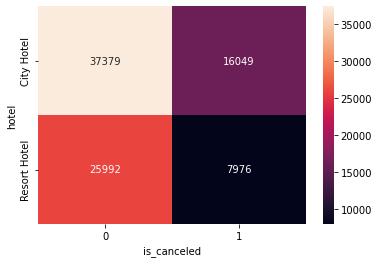

In [18]:
sns.heatmap(pd.crosstab(index=df["hotel"],columns=df["is_canceled"]),annot=True,fmt='d')

Text(0.5, 1.0, 'hotel vs is_canceled')

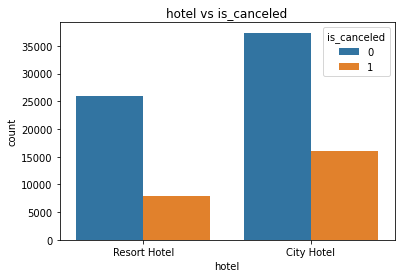

In [19]:
sns.countplot(x=df["hotel"],hue=df["is_canceled"])
plt.title("hotel vs is_canceled")

## Lead Time Analysis

Text(0.5, 1.0, 'Lead Time vs Hotel')

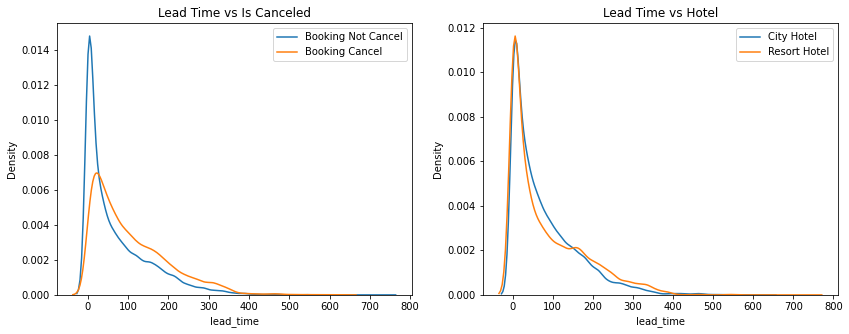

In [25]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(df[df['is_canceled']==0]['lead_time'],hist=False,label="Booking Not Cancel")
sns.distplot(df[df['is_canceled']==1]['lead_time'],hist=False,label="Booking Cancel")
plt.legend(["Booking Not Cancel","Booking Cancel"])
plt.title("Lead Time vs Is Canceled")
plt.subplot(1,2,2)
sns.distplot(df[df['hotel']=="City Hotel"]['lead_time'],hist=False)
sns.distplot(df[df['hotel']=="Resort Hotel"]['lead_time'],hist=False)
plt.legend(["City Hotel","Resort Hotel"])
plt.title("Lead Time vs Hotel")

## Arrival Year, month, Days, Week Analysis

### **Arrival Year**

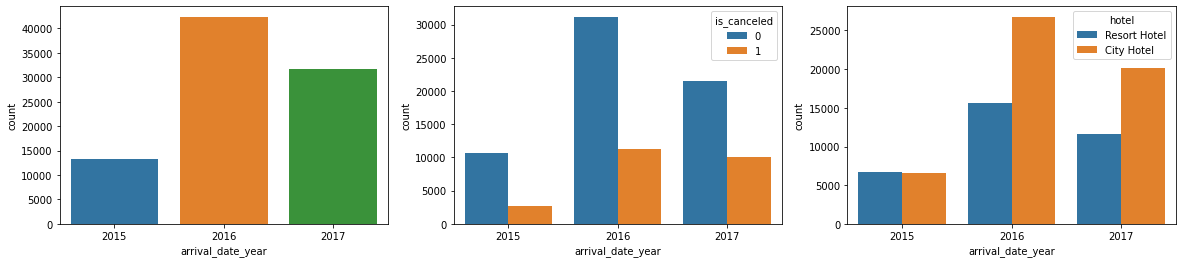

In [29]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(
    x = df["arrival_date_year"]
)
plt.subplot(132)
sns.countplot(
    x = df["arrival_date_year"],
    hue=df["is_canceled"]
)
plt.subplot(133)
sns.countplot(
    x = df["arrival_date_year"],
    hue=df["hotel"]
)

### **Arrival Month**

Text(0.5, 1.0, 'Arrival Month vs Hotel')

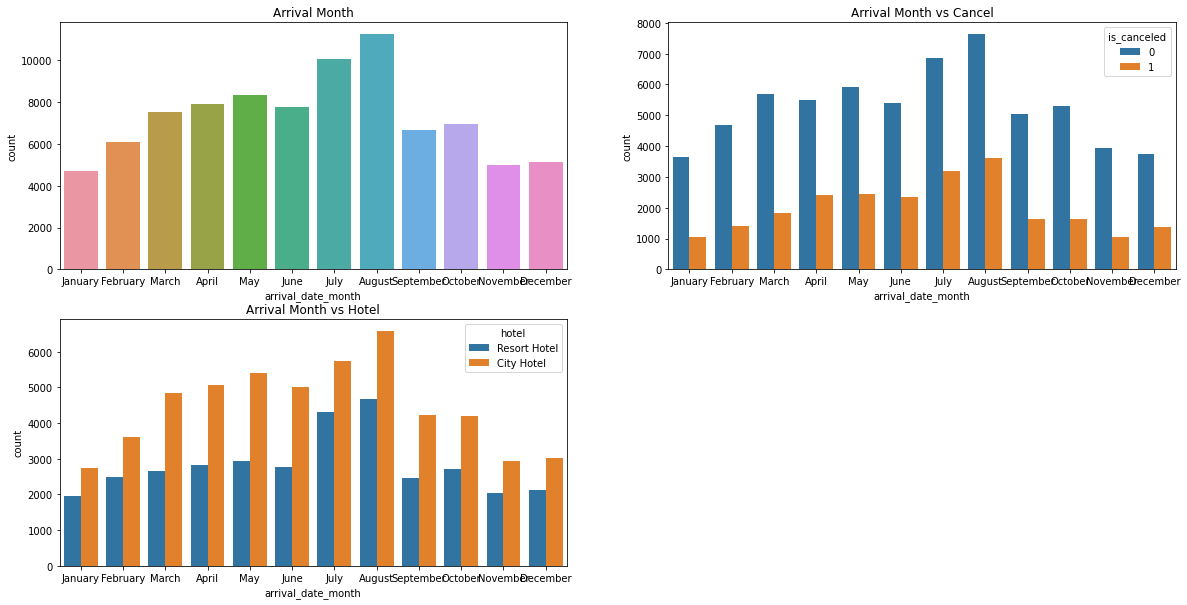

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(
    x=df["arrival_date_month"],
    order=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Arrival Month")
plt.subplot(222)
sns.countplot(
    x=df["arrival_date_month"],
    hue=df["is_canceled"],
    order=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Arrival Month vs Cancel")
plt.subplot(223)
sns.countplot(
    x=df["arrival_date_month"],
    hue=df["hotel"],
    order=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Arrival Month vs Hotel")

### **Arrival Day Of Month**

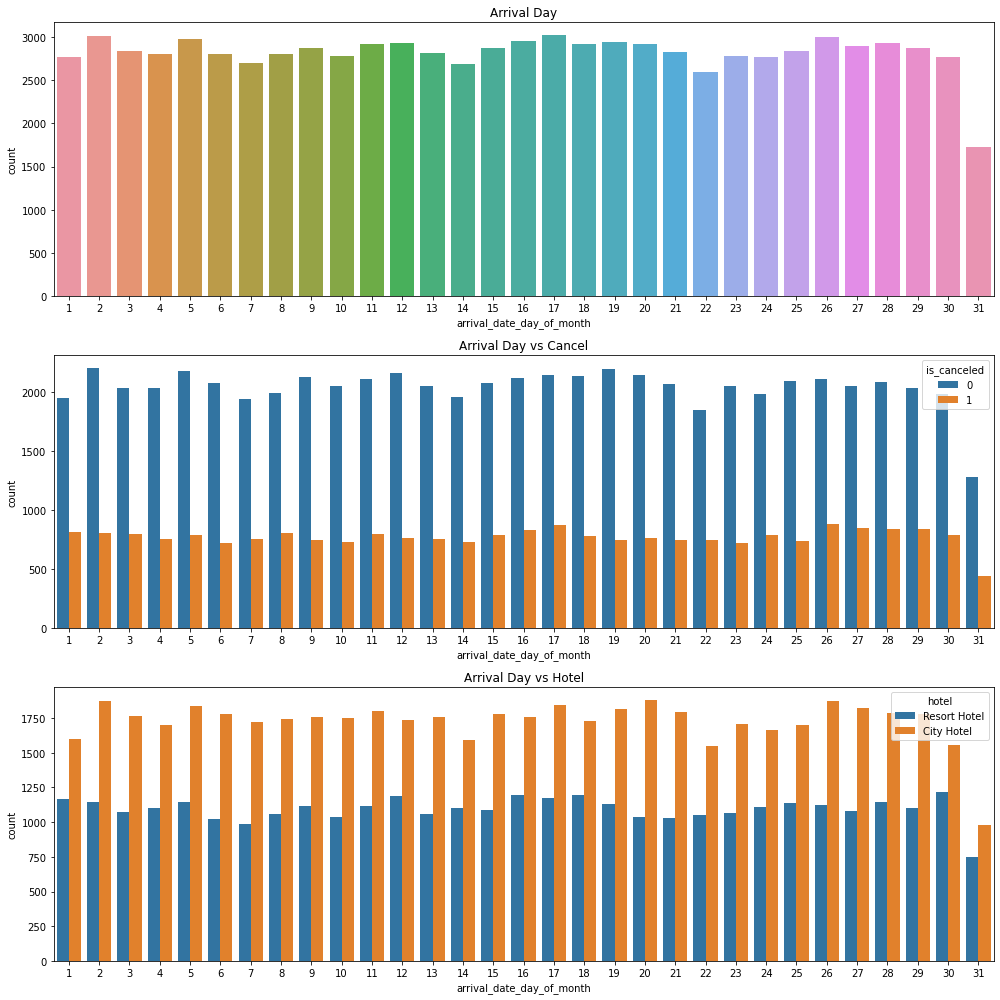

In [37]:
plt.figure(figsize=(14,14))
plt.subplot(311)
sns.countplot(
    x=df["arrival_date_day_of_month"]
)
plt.title("Arrival Day")
plt.subplot(312)
sns.countplot(
    x=df["arrival_date_day_of_month"],
    hue = df["is_canceled"]
)
plt.title("Arrival Day vs Cancel")
plt.subplot(313)
sns.countplot(
    x=df["arrival_date_day_of_month"],
    hue=df["hotel"]
)
plt.title("Arrival Day vs Hotel")
plt.tight_layout()
plt.show()

### **Arrival Date Week Number**

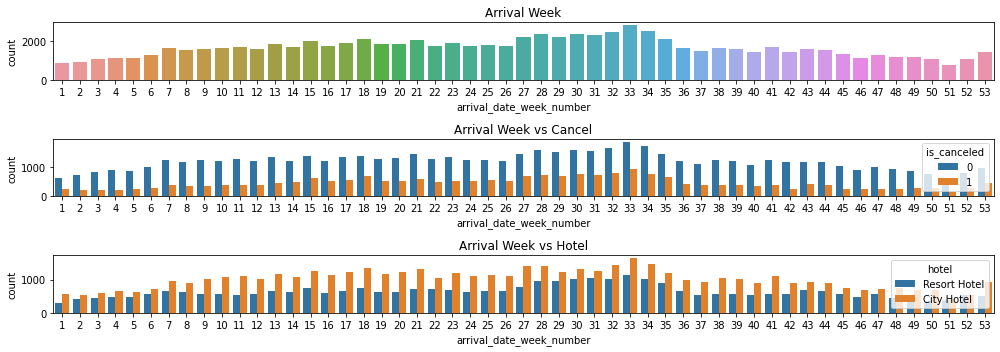

In [39]:
plt.figure(figsize=(14,5))
plt.subplot(311)
sns.countplot(
    x=df["arrival_date_week_number"]
)
plt.title("Arrival Week")
plt.subplot(312)
sns.countplot(
    x=df["arrival_date_week_number"],
    hue=df["is_canceled"]
)
plt.title("Arrival Week vs Cancel")
plt.subplot(313)
sns.countplot(
    x=df["arrival_date_week_number"],
    hue=df["hotel"]
)
plt.title("Arrival Week vs Hotel")
plt.tight_layout()
plt.show()

## Stay Weekend Night Or Stay Week Night Data Analysis

### **Stay week Night**

In [47]:
stay_week_night_df = pd.DataFrame([df["stays_in_week_nights"].value_counts(),df["stays_in_week_nights"].value_counts(normalize=True)*100]).T
stay_week_night_df.columns = ["Number_Of_Data", "Percentage_Of_Data"]

stay_week_night_df.head()

,Number_Of_Data,Percentage_Of_Data
1,22191.0,25.391322
2,20744.0,23.735640
3,16259.0,18.603826
5,9663.0,11.056570
4,7874.0,9.009566


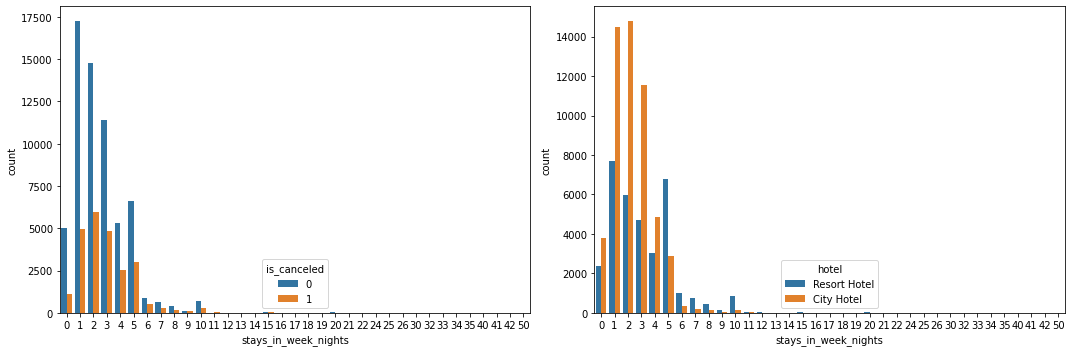

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(df["stays_in_week_nights"],hue=df["is_canceled"])

plt.subplot(122)
sns.countplot(df["stays_in_week_nights"],hue=df["hotel"])

plt.tight_layout()
plt.show()

In [58]:
stay_week_night_vs_cancel_df = pd.crosstab(index=df["stays_in_week_nights"],columns=df["is_canceled"])
stay_week_night_vs_hotel_df = pd.crosstab(index=df["stays_in_week_nights"],columns=df["hotel"])

In [59]:
stay_week_night_vs_hotel_df.head()

hotel,City Hotel,Resort Hotel
stays_in_week_nights,,
0,3797,2378
1,14471,7720
2,14791,5953
3,11569,4690
4,4864,3010


### **stay weekend Night in hotel**

In [60]:
stay_weekend_night_df = pd.DataFrame([df["stays_in_weekend_nights"].value_counts(),df["stays_in_weekend_nights"].value_counts(normalize=True)*100]).T
stay_weekend_night_df.columns = ["Number_Of_Data", "Percentage_Of_Data"]

stay_weekend_night_df.head()

,Number_Of_Data,Percentage_Of_Data
0,35151.0,40.220376
2,26414.0,30.223351
1,22657.0,25.924527
4,1734.0,1.984072
3,1150.0,1.315850


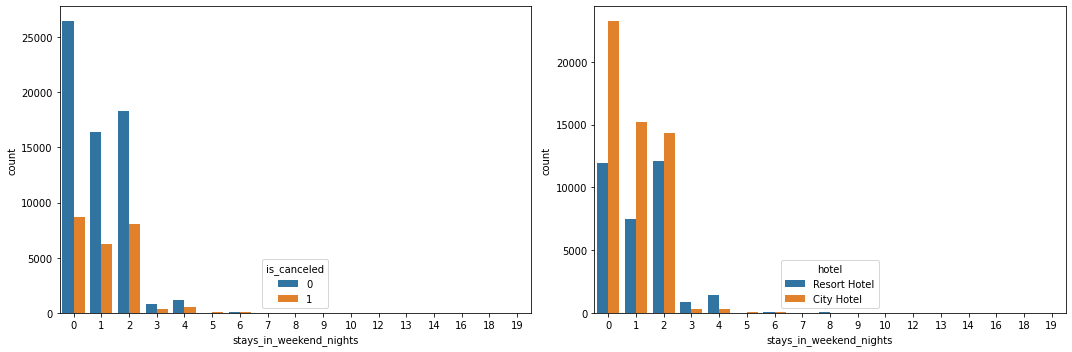

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(df["stays_in_weekend_nights"],hue=df["is_canceled"])

plt.subplot(122)
sns.countplot(df["stays_in_weekend_nights"],hue=df["hotel"])

plt.tight_layout()
plt.show()

In [62]:
stay_weekend_night_vs_cancel_df = pd.crosstab(index=df["stays_in_weekend_nights"],columns=df["is_canceled"])
stay_weekend_night_vs_hotel_df = pd.crosstab(index=df["stays_in_weekend_nights"],columns=df["hotel"])

In [63]:
stay_weekend_night_vs_hotel_df.head()

hotel,City Hotel,Resort Hotel
stays_in_weekend_nights,,
0,23249,11902
1,15171,7486
2,14308,12106
3,301,849
4,277,1457


## Adults, Children, Babies

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
